In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [5]:
data.isnull().any()

number_courses    False
time_study        False
Marks             False
dtype: bool

In [6]:
data.nunique()

number_courses      6
time_study        100
Marks             100
dtype: int64

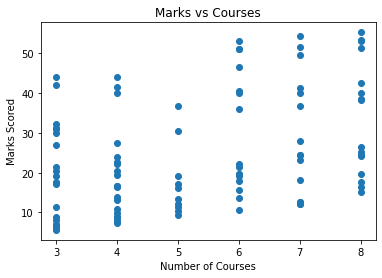

In [7]:
plt.scatter(x=data['number_courses'],y=data['Marks'])
plt.xlabel('Number of Courses')
plt.ylabel('Marks Scored')
plt.title('Marks vs Courses')
plt.show()

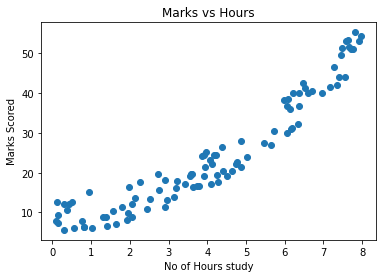

In [8]:
plt.scatter(x=data['time_study'],y=data['Marks'])
plt.xlabel('No of Hours study')
plt.ylabel('Marks Scored')
plt.title('Marks vs Hours')
plt.show()

<AxesSubplot:>

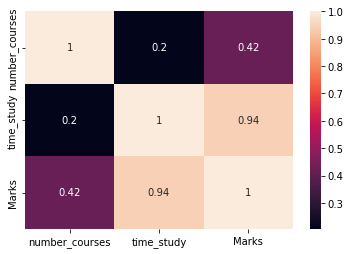

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
#from sklearn.Scaler import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data.iloc[:,2],test_size=0.2,random_state=0)

# Linear Regression

In [11]:
Accuracy=pd.DataFrame({'Model':[],'Training Score':[],'Testing Score':[]})

In [12]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [13]:
temp=[('Linear Regression',LR_model.score(x_train,y_train),LR_model.score(x_test,y_test))]
Accuracy=Accuracy.append(pd.DataFrame(temp,columns=['Model','Training Score','Testing Score']))

# Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
temp=[('Random Forest',RF_model.score(x_train,y_train),RF_model.score(x_test,y_test))]
Accuracy=Accuracy.append(pd.DataFrame(temp,columns=['Model','Training Score','Testing Score']))

# K Nearest Neighbor

In [16]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor()
KNN_model.fit(x_train,y_train)

KNeighborsRegressor()

In [17]:
temp=[('K Nearest Neighbor',KNN_model.score(x_train,y_train),KNN_model.score(x_test,y_test))]
Accuracy=Accuracy.append(pd.DataFrame(temp,columns=['Model','Training Score','Testing Score']))

## Accuracy of Different Models

In [18]:
Accuracy

,Model,Training Score,Testing Score
0,Linear Regression,0.940365,0.937935
0,Random Forest,0.997618,0.989788
0,K Nearest Neighbor,0.993001,0.993782


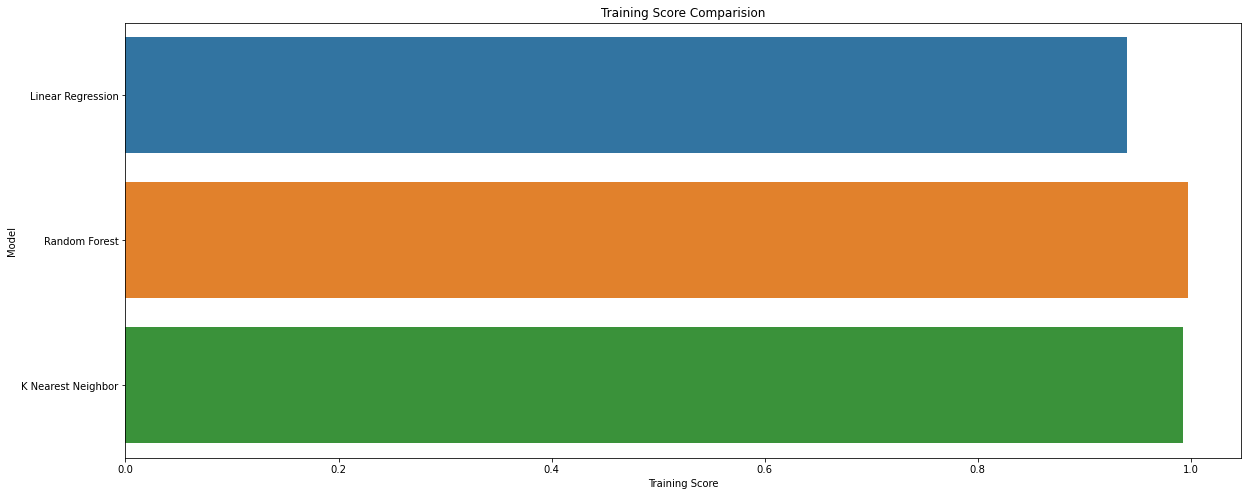

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(y='Model',x='Training Score',data=Accuracy,)
plt.title('Training Score Comparision')
plt.show()

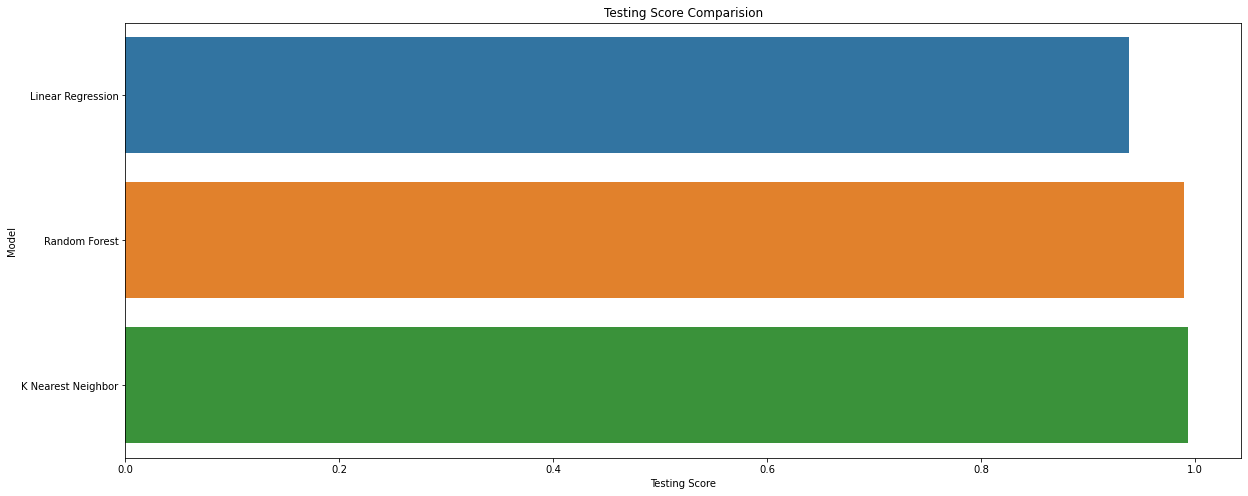

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(y='Model',x='Testing Score',data=Accuracy)
plt.title('Testing Score Comparision')
plt.show()